In [13]:
from handlers import files_handler
from handlers import image_handler
from handlers import label_handler
import pandas as pd
import numpy as np
import random
from skimage import io
from utils import utils
import matplotlib as mpl
import matplotlib.pyplot as plt
from utils.consts import *


max width - 31, max height - 33


<Figure size 432x288 with 0 Axes>

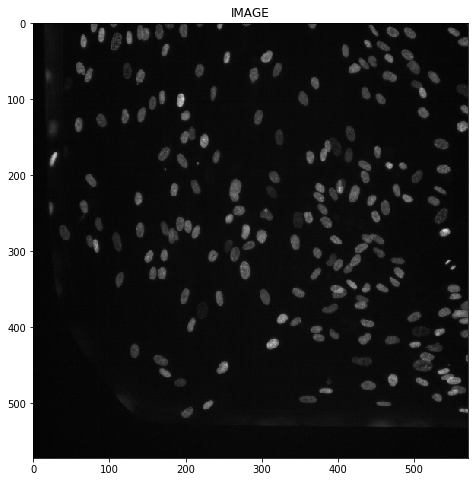

,src_img_name,mask_id,left_x,right_x,top_y,bottom_y,cell_id_cp
1843,r02c02f15p01-ch4sk1fk1fl1.tiff,26bf2594-aace-4ba2-bdc5-dfdca59aabc6,6,16,408,426,2
1844,r02c02f15p01-ch4sk1fk1fl1.tiff,65732948-fe44-44d1-beaf-603c04f531ff,6,18,160,174,3
1845,r02c02f15p01-ch4sk1fk1fl1.tiff,26687b31-1dbf-41c6-a2d8-53455db88fdd,6,21,293,310,4
1846,r02c02f15p01-ch4sk1fk1fl1.tiff,a468b80f-4c4a-4d25-987e-92f6ce90d553,12,24,122,137,5
1847,r02c02f15p01-ch4sk1fk1fl1.tiff,0215e50c-ee3b-44db-be75-6176c8909b1c,21,34,329,343,6


In [14]:
df = pd.read_csv(files_handler.get_csv_file_path())
#df.head()

max_width = utils.get_max_width(df)
max_height = utils.get_max_height(df)
print(f"max width - {max_width}, max height - {max_height}")

images = df.src_img_name.unique()
img_map = utils.get_random_images(images, 5)
for name, img in img_map.items():
    utils.show_image(img)
    break

masks_csv_data = df[df.src_img_name.isin(list(img_map.keys()))]
masks_csv_data.head()

<Figure size 432x288 with 0 Axes>

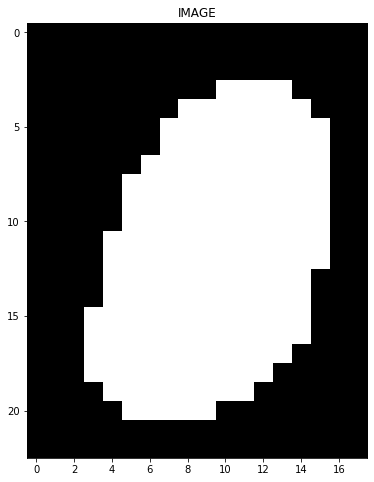

<Figure size 432x288 with 0 Axes>

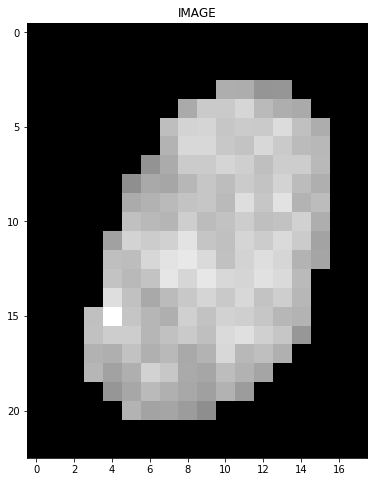

In [15]:
mask_row = utils.pick_random_mask(masks_csv_data)
mask_img = utils.read_mask(mask_row)
utils.show_image(mask_img)

extracted_cell = utils.extract_cell_image(mask_row.left_x.values[0],
                                    mask_row.right_x.values[0],
                                    mask_row.top_y.values[0],
                                    mask_row.bottom_y.values[0],
                                    img_map[mask_row.src_img_name.values[0]],
                                    mask_img)
utils.show_image(extracted_cell)

<Figure size 432x288 with 0 Axes>

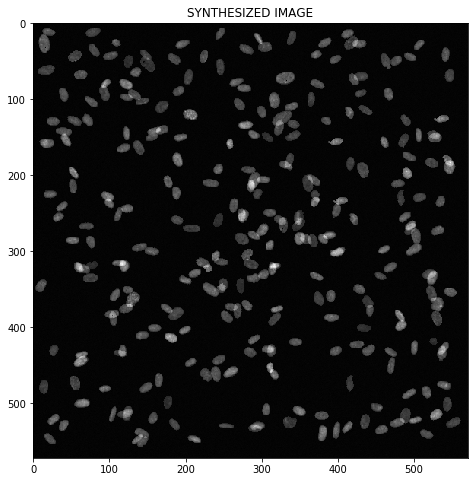

In [16]:
noise_matrix = np.load(files_handler.get_noise_matrix_file_path())
img_handler = image_handler.ImageHandler(572,572,max_height,max_width, noise_matrix)
lbl_handler = label_handler.LabelHandler(572, 572, 3)

for index in range(300):
    mask_row = utils.pick_random_mask(masks_csv_data)
    mask_img = utils.read_mask(mask_row)
    extracted_cell = utils.extract_cell_image(mask_row.left_x.values[0],
                                    mask_row.right_x.values[0],
                                    mask_row.top_y.values[0],
                                    mask_row.bottom_y.values[0],
                                    img_map[mask_row.src_img_name.values[0]],
                                    mask_img)
    pos_x = img_handler.get_random_col_pos()
    pos_y = img_handler.get_random_row_pos()
    result_layer, change_other = lbl_handler.check_position(pos_x, pos_y, mask_img)

    if not result_layer == INVALID_POS:
        img_handler.place_cell(pos_x, pos_y, extracted_cell)
        lbl_handler.place_cell(pos_x, pos_y, mask_img, result_layer, change_other)

img_handler.add_background_noise()
img_handler.normalize()
utils.show_image(img_handler.image, title="SYNTHESIZED IMAGE", save=False)

In [17]:
img_name = files_handler.generate_img_file_name()
img_handler.save_image(img_name)
lbl_handler.save_label(img_name)

<Figure size 432x288 with 0 Axes>

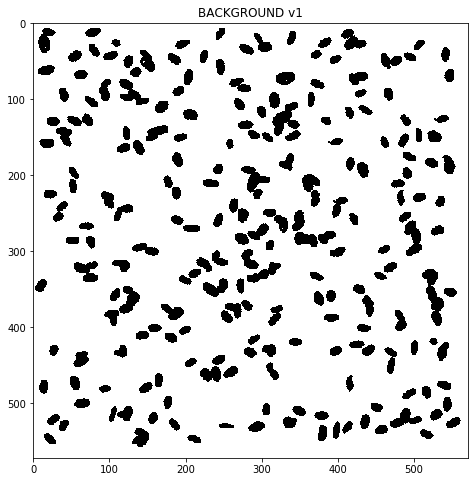

In [18]:
utils.show_image(lbl_handler.label[0, :, :], title="BACKGROUND v1", save=False)

<Figure size 432x288 with 0 Axes>

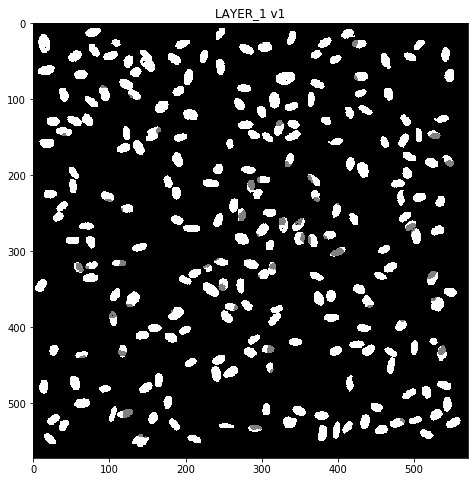

In [19]:
utils.show_image(lbl_handler.label[1, :, :], title="LAYER_1 v1", save=False)

<Figure size 432x288 with 0 Axes>

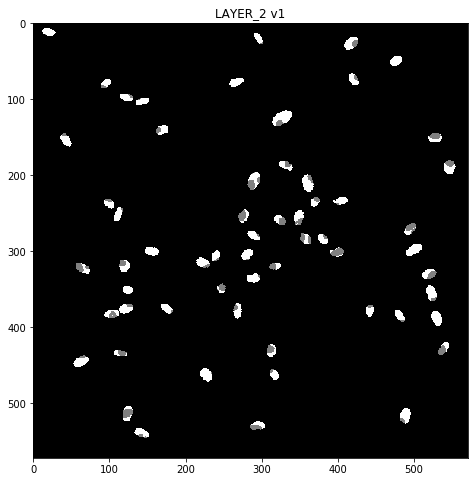

In [20]:
utils.show_image(lbl_handler.label[2, :, :], title="LAYER_2 v1", save=False)

<Figure size 432x288 with 0 Axes>

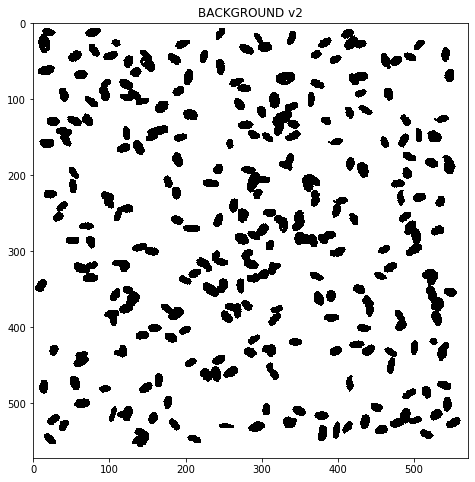

In [21]:
utils.show_image(lbl_handler.label_v2[0, :, :], title="BACKGROUND v2", save=False)

<Figure size 432x288 with 0 Axes>

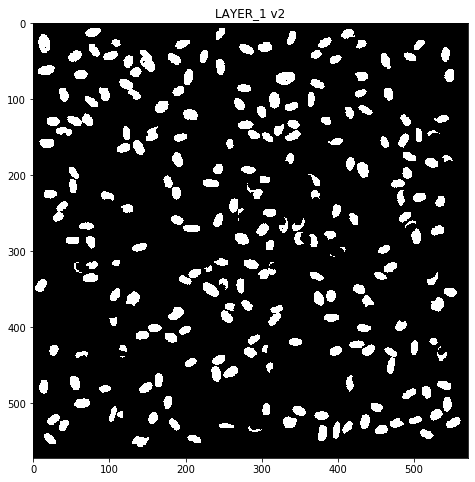

In [22]:
utils.show_image(lbl_handler.label_v2[1, :, :], title="LAYER_1 v2", save=False)

<Figure size 432x288 with 0 Axes>

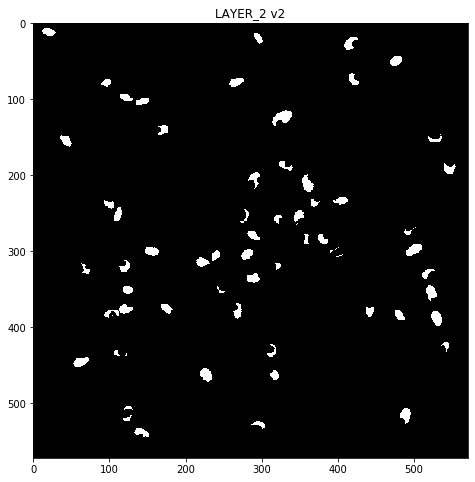

In [23]:
utils.show_image(lbl_handler.label_v2[2, :, :], title="LAYER_2 v2", save=False)

<Figure size 432x288 with 0 Axes>

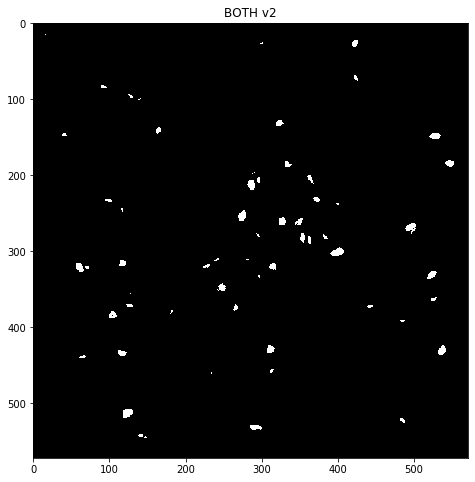

In [24]:
utils.show_image(lbl_handler.label_v2[3, :, :], title="BOTH v2", save=False)
